# Sample ROS Prov
###### Note: This file was made manually just to create a sample model of the provenance info for ROS. The same concepts can then be used to model actual ROS programs

In [1]:
# Importing the required libraries
from prov.model import ProvDocument
import prov
import datetime

# For visualizations
from prov.dot import prov_to_dot
from IPython.display import Image

In [2]:
# First we create a Provenance data file
ros = ProvDocument()

In [3]:
# We can write name spaces here
ros.set_default_namespace('https://docs.ros.org/en/dashing/Installation.html')
ros.add_namespace('node', 'https://docs.ros.org/en/dashing/Tutorials/Understanding-ROS2-Nodes.html') # represents ros nodes
ros.add_namespace('topic', 'https://docs.ros.org/en/dashing/Tutorials/Topics/Understanding-ROS2-Topics.html') # represents ros topics
ros.add_namespace('activity', 'undefined') # represents the processes performed

# Some more for future use
ros.add_namespace('module', 'python programs or groups') # represents collection of ros enities, may be in the form of a program
ros.add_namespace('user', 'agent editing/contributing to the program') # represents code contributors
ros.add_namespace('enduser', 'end user who interacts with the program') # this represents the end user and his interaction with the code

# Printing the prov so far
print(ros.get_provn())

document
  default <https://docs.ros.org/en/dashing/Installation.html>
  prefix node <https://docs.ros.org/en/dashing/Tutorials/Understanding-ROS2-Nodes.html>
  prefix topic <https://docs.ros.org/en/dashing/Tutorials/Topics/Understanding-ROS2-Topics.html>
  prefix activity <undefined>
  prefix module <python programs or groups>
  prefix user <agent editing/contributing to the program>
  prefix enduser <end user who interacts with the program>
  
endDocument


### Creating the elements of Prov (Entities, Agents and Activities/Processes)

In [4]:
# First we generate the nodes as agents
ros.agent('node:talker')
ros.agent('node:listner')
ros.agent('node:/_ros2cli_daemon_0')

# Printing the prov so far
print(ros.get_provn())

document
  default <https://docs.ros.org/en/dashing/Installation.html>
  prefix node <https://docs.ros.org/en/dashing/Tutorials/Understanding-ROS2-Nodes.html>
  prefix topic <https://docs.ros.org/en/dashing/Tutorials/Topics/Understanding-ROS2-Topics.html>
  prefix activity <undefined>
  prefix module <python programs or groups>
  prefix user <agent editing/contributing to the program>
  prefix enduser <end user who interacts with the program>
  
  agent(node:talker)
  agent(node:listner)
  agent(node:/_ros2cli_daemon_0)
endDocument


In [5]:
# We then create the processes/activities
ros.activity('activity:Publish_to_chatter', datetime.datetime.now()) # The topic name is associated with the activity itself
ros.activity('activity:Subscribe_to_chatter', datetime.datetime.now())
ros.activity('activity:Publish_to_parameter_events', datetime.datetime.now())
ros.activity('activity:Publish_to_rosout', datetime.datetime.now())

# Printing the prov so far
print(ros.get_provn())

document
  default <https://docs.ros.org/en/dashing/Installation.html>
  prefix node <https://docs.ros.org/en/dashing/Tutorials/Understanding-ROS2-Nodes.html>
  prefix topic <https://docs.ros.org/en/dashing/Tutorials/Topics/Understanding-ROS2-Topics.html>
  prefix activity <undefined>
  prefix module <python programs or groups>
  prefix user <agent editing/contributing to the program>
  prefix enduser <end user who interacts with the program>
  
  agent(node:talker)
  agent(node:listner)
  agent(node:/_ros2cli_daemon_0)
  activity(activity:Publish_to_chatter, 2021-06-06T12:33:53.637732, -)
  activity(activity:Subscribe_to_chatter, 2021-06-06T12:33:53.637815, -)
  activity(activity:Publish_to_parameter_events, 2021-06-06T12:33:53.637870, -)
  activity(activity:Publish_to_rosout, 2021-06-06T12:33:53.637921, -)
endDocument


In [6]:
# We then create the entities that are being used
ros.entity('topic:chatter',\
           {'prov:label':'chatter',\
            'prov:type':'std_msgs/msg/String',\
            'prov:list_of_publishers':'node_talker',\
            'prov:list_of_subscribers':'node_listener',\
            'prov:time_initialized':datetime.datetime.now()})
ros.entity('topic:parameter_events',\
           {'prov:label':'parameter_events',\
            'prov:type':'rcl_interfaces/msg/ParameterEvent',\
            'prov:time_initialized':datetime.datetime.now()})
ros.entity('topic:rosout',\
           {'prov:label':'rosout',\
            'prov:type':'rcl_interfaces/msg/Log',\
            'prov:time_initialized':datetime.datetime.now()})

# What if we declare an entity with the same name
# ros.entity('topic:chatter', {'prov:time_initialized':'00000253500000.00'})

# Printing the prov doc so far
print(ros.get_provn())

document
  default <https://docs.ros.org/en/dashing/Installation.html>
  prefix node <https://docs.ros.org/en/dashing/Tutorials/Understanding-ROS2-Nodes.html>
  prefix topic <https://docs.ros.org/en/dashing/Tutorials/Topics/Understanding-ROS2-Topics.html>
  prefix activity <undefined>
  prefix module <python programs or groups>
  prefix user <agent editing/contributing to the program>
  prefix enduser <end user who interacts with the program>
  
  agent(node:talker)
  agent(node:listner)
  agent(node:/_ros2cli_daemon_0)
  activity(activity:Publish_to_chatter, 2021-06-06T12:33:53.637732, -)
  activity(activity:Subscribe_to_chatter, 2021-06-06T12:33:53.637815, -)
  activity(activity:Publish_to_parameter_events, 2021-06-06T12:33:53.637870, -)
  activity(activity:Publish_to_rosout, 2021-06-06T12:33:53.637921, -)
  entity(topic:chatter, [prov:label="chatter", prov:type="std_msgs/msg/String", prov:list_of_publishers="node_talker", prov:list_of_subscribers="node_listener", prov:time_initializ

### Drawing the Relations between 

In [7]:
# Finally we draw the relations between the nodes and the topics

# Node talker generated topic chatter and the other 2 nodes were generated by the cli
ros.wasGeneratedBy('topic:chatter', 'node:talker')
ros.wasGeneratedBy('topic:parameter_events', 'node:/_ros2cli_daemon_0')
ros.wasGeneratedBy('topic:rosout', 'node:/_ros2cli_daemon_0')


# Chatter uses the Publish_to_chatter activity to which data is publish by talker
ros.used('activity:Publish_to_chatter', 'topic:chatter')
ros.used('node:talker','activity:Publish_to_chatter')

# Listner listens to the chatter topic via listen process
ros.used('activity:Subscribe_to_chatter','node:listner')
ros.used('topic:chatter', 'activity:Subscribe_to_chatter')


<ProvUsage: (topic:chatter, activity:Subscribe_to_chatter)>

In [8]:
# Defining the hidden relations

# Publishing to parameter_events
# talker
ros.used('activity:Publish_to_parameter_events', 'topic:parameter_events')
ros.used('node:talker','activity:Publish_to_parameter_events')
ros.used('node:/_ros2cli_daemon_0','activity:Publish_to_parameter_events')

# chatter
# ros.used('activity:Publish_to_parameter_events', 'topic:parameter_events')
ros.used('node:listner','activity:Publish_to_parameter_events')


# Publishing to rosout
# talker
ros.used('activity:Publish_to_rosout', 'topic:rosout')
ros.used('node:talker','activity:Publish_to_rosout')
# chatter
# ros.used('activity:Publish_to_rosout', 'topic:rosout')
ros.used('node:listner','activity:Publish_to_rosout')
# ros 2 cli
ros.used('node:/_ros2cli_daemon_0','activity:Publish_to_rosout')


<ProvUsage: (node:/_ros2cli_daemon_0, activity:Publish_to_rosout)>

### Visualizing the Prov Model

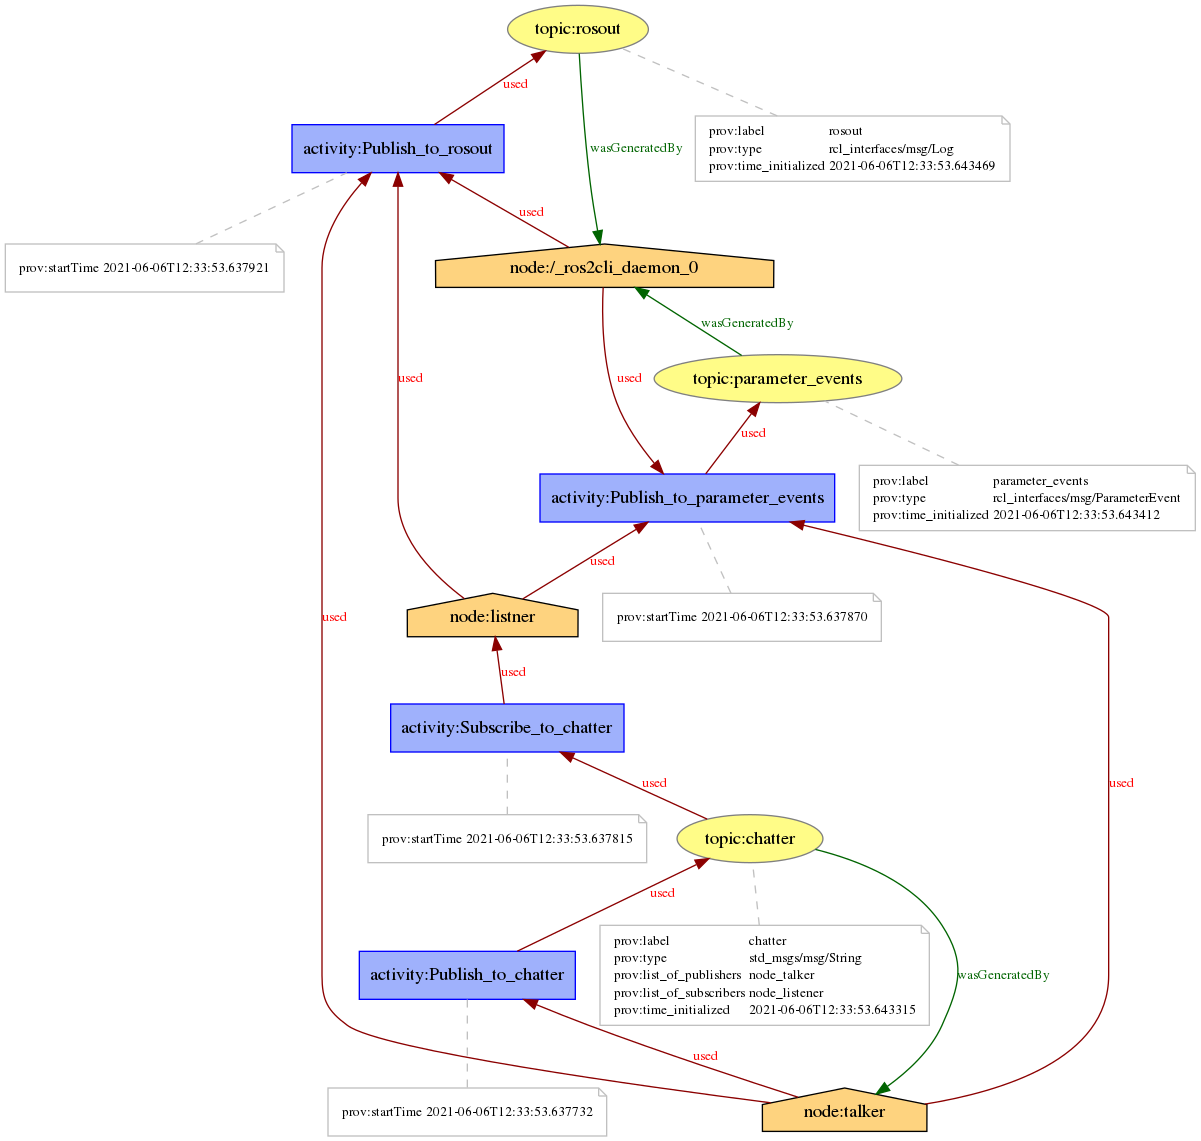

In [9]:
# visualize the graph
dot = prov_to_dot(ros)
dot.write_png('ros-prov.png')
Image('ros-prov.png')

## Seeing how it (the model) responds to different cases

In [10]:
### Inserting a topic with the same name
ros.agent('node:/_ros2cli_daemon_0')

<ProvAgent: node:/_ros2cli_daemon_0>

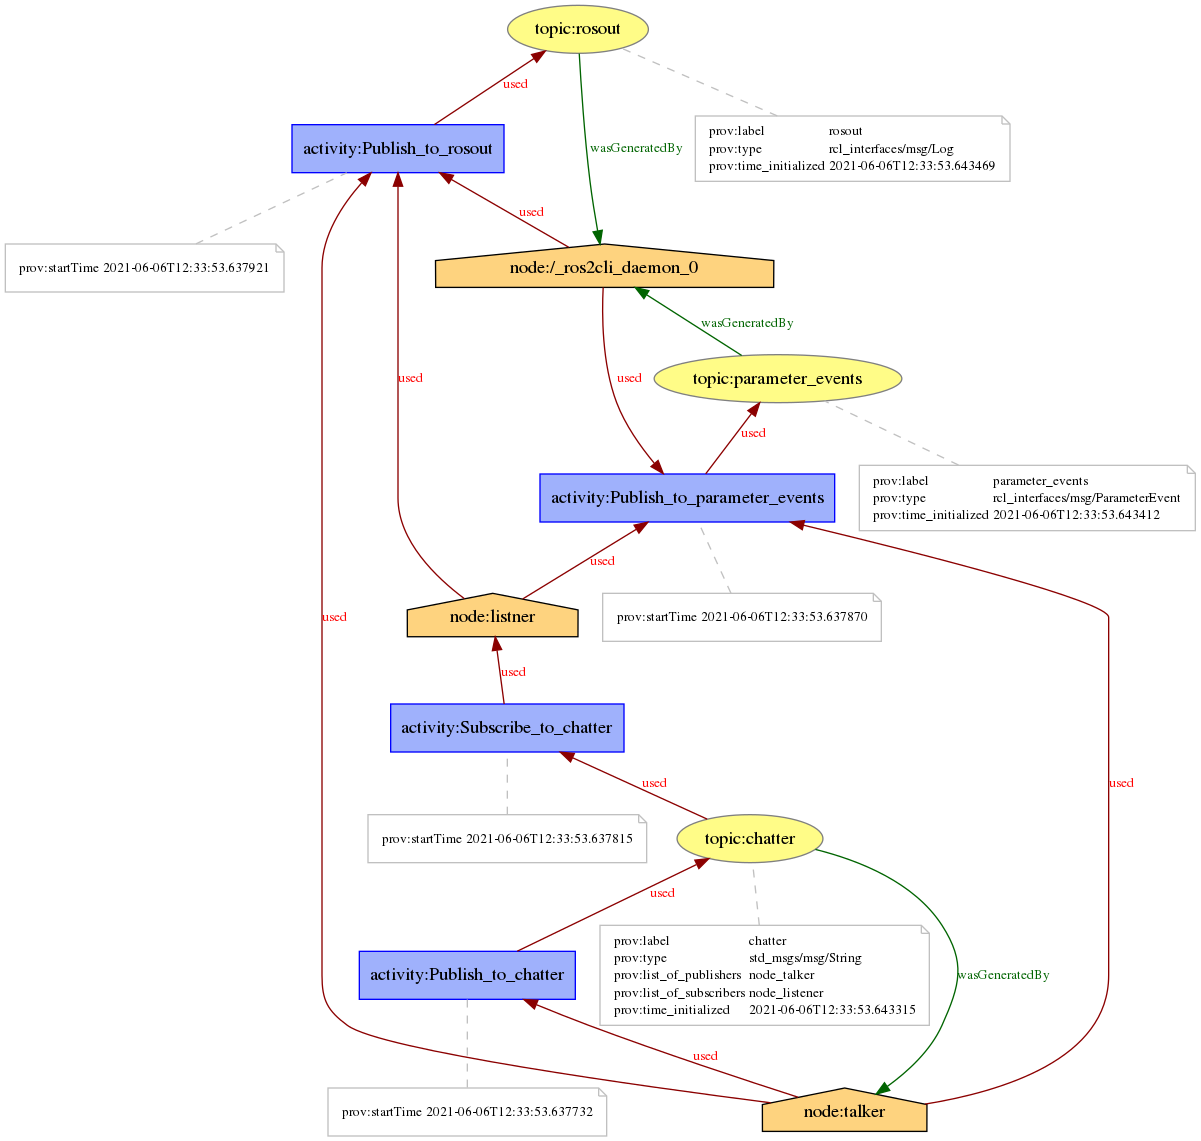

In [11]:
# visualize the graph
dot = prov_to_dot(ros)
dot.write_png('ros-prov.png')
Image('ros-prov.png')